# **The estimation of parameters without prior knowledge of the characteristic function. It is enough just to be able to simulate samples from the distribution of interest**


In this report, we demonstrate that even in the absence of prior knowledge of the characteristic function, we can utilize the empirical characteristic function. Therefore, generating samples from the distribution of interest is sufficient to obtain high-quality estimators, almost akin to the maximum likelihood estimator.

In this report we focus on the Variance Gamma distribution: estimation of the $\theta$ parameter.



# The methodology

The Fisher information $I(\alpha)$ of the tail index $\alpha$ is calculated as follows:

if $X\sim S_{\alpha}(1,0,0)$ and $p(x,\alpha)$ is its density function, then
$$I(\alpha) = \int_{-\infty}^{+\infty}J^2(x, \alpha)p(x,\alpha)dx,$$
where $J(x,\alpha)=\frac{  \left( \frac{\partial p(x,\alpha)}{\partial \alpha} \right) }{p(x,\alpha)}$. 

For the sample $X_1, X_2, ..., X_n$ ***maximum likelihood*** estimate is obtained as follows:
$$\hat{\alpha}_{ML}=\left\{\alpha : \sum_{j=1}^{n} J(X_j, \alpha) = 0\right\}$$

If a proper estimate of the function $J(x, \alpha)$ is found, then it can be used for the estimation of the parameters. 

In the ***maximum likelihood projections*** method (MLP), the function $J(x,\alpha)$ is projected to the space $\{1, \exp(i\cdot t_1 x), \exp(i\cdot t_2 x), ..., \exp(i \cdot t_k x) \}$, i.e.
$$J_k(x,\alpha) = \sum_{j=0}^{k}a_j \exp(i\cdot t_jx),$$
where $t_0=0$, and $t_1,t_2,...,t_k$ are randomly chosen non-zero numbers. 

The scalar product in this space is defined as follows:
if $X\sim \psi_X$, i.e. the characteristic function of $X$ is $\psi_X(t)=\psi(t)$, then we define the scalar product as follows:

$$\langle \exp(i\cdot t_m X), \exp(i\cdot t_n X) \rangle =\mathbb{E}\exp(i\cdot t_m X)\cdot \exp(i\cdot t_n X)=$$
$$=\mathbb{E}\exp(i\cdot (t_m + t_n)\cdot X) =\psi(t_m+t_n). $$

The usage of orthogonal projections implies:
$$\langle (J_k(X,\alpha)-J(X,\alpha)), \exp(i\cdot t_j X)\rangle = 0,\quad j=1,2,...,k.$$
In the paper it is shown that the previous equation is equivalent to (Proven [In this report](https://colab.research.google.com/drive/1w-l2tJtChO89jmwn2q-ywV0ZAXiKDZrI#scrollTo=yBPy2lHLAVU8) and [in this paper](https://eudml.org/doc/262151)):
$$\sum_{i=0}^{k}a_i \psi(t_i+t_j,\alpha) = \frac{\partial}{\partial \alpha}\psi(t_j,\alpha), \quad j=1,2,...,k.$$


If $A(\alpha) = \{\psi(t_i+t_j,\alpha),\quad i,j=0,1,..,k\}$ and $b(\alpha)=\{0\}\cup \{  \psi_{\alpha}(t_j, \alpha),\quad j=1,2,..,k \}$, then
$$J_k(x,\alpha) = \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} F(T, X_j),$$
where $F(T, X)=\{1, \exp(i\cdot t_1 X), \exp(i\cdot t_2 X), ..., \exp(i \cdot t_k X) \}$, and $T=\{t_0,t_1,...,t_k\}$.

To get rid of the imaginary component, we can use the following trick associated with the choice of the parameters $t_1,t_2,...,t_k$:
$$J^*(x,\alpha)=\sum_{j=-k}^{k}a_j\exp\left( i\cdot t_jx\right) \text{ with }a_{-j}=a_j\text{ and }t_{-j}=t_j,j=1,2,...,k, $$
then 
$$J^*(x,\alpha) = a_0 + \sum_{j=1}^{k}a_j\left(\exp(i\cdot t_j x) +\exp(-i\cdot t_jx) \right) = a_0 + 2\sum_{j=1}^{k}a_j\cos(t_j x).$$

The corresponding system of equations in this formulation is 
$$\sum_{i=0}^{k}a_i \left(\psi(t_i+t_j,{\alpha}) + \psi(t_i-t_j,\alpha) \right)= \psi_{\alpha}(t_j,\alpha), \quad j=1,2,...,k,$$
and $F(T, X)=\{1, 2\cos(t_1 X), 2\cos(t_2 X), ..., 2\cos(t_k X) \}$.

**Implementation in code:**

By replacing $a_0$ with $a^*_0 = a_0/2$, we get:

\begin{align*}
J^*_k(x,\alpha) &= 2a^*_0 + 2\sum_{j=1}^{k}a_j\cos(t_j x) \\
F(T, X) &= \{2, 2\cos(t_1 X), 2\cos(t_2 X), ..., 2\cos(t_k X) \} \\
A(\alpha) & =  \{\psi(t_i+t_j,{\alpha}) + \psi(t_i-t_j,\alpha),\quad i,j=0,1,..,k\} \\
b(\alpha) & = \{0\}\cup \{  \psi_{\alpha}(t_j, \alpha),\quad j=1,2,..,k \}\\
\mathbf{Hence} & \\
J^*_k(x,\alpha) &= 2a^*_0 + 2\sum_{j=1}^{k}a_j\cos(t_j x) =  \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} F(T, x) \\
\sum_{j=1}^{n}J^*_k(X_m,\alpha)& = \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \sum_{m=1}^{n}F(T, X_m) \\
\mathbf{Finally} & \\
 \hat{\alpha}_{MLP}& =\mathrm{agrmin}_{\alpha}\left| \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{m=1}^{n}F(T, X_m) \right|
\end{align*}

# **When the characteristic function $\psi(t)$ is not known, we can deal with the empirical characteristic function $\psi_{\mathbf{X}}(t)$, where $\mathbf{X}$ is a sample. In this report, we demonstrate how to do without the characteristic function.**

In [ ]:
# importing the packages that will be used in this code
import numpy as np                   # for the operations with matrices and vectors
import matplotlib.pyplot as plt      # for visualizations
from scipy.stats import levy_stable  # for generating samples from S_{\alpha}(1,0,0)

The following dictionary of functions is used for building the vector $T$ for the method of projections. 

First, an array of equidistant numbers is generated, and then then the vectorized function from that dictionary is applied element-wise to that vector. The choice of this function affects the quality of the estimation.

In [ ]:
portfolio_of_functions = {}
portfolio_of_functions.update({'sin(x)       ': np.vectorize(lambda x: np.sin(x))})
portfolio_of_functions.update({'x            ': np.vectorize(lambda x: x)})
portfolio_of_functions.update({'x**2         ': np.vectorize(lambda x: x*x)})
portfolio_of_functions.update({'x**3         ': np.vectorize(lambda x: x*x*x)})
portfolio_of_functions.update({'x**4         ': np.vectorize(lambda x: x*x*x*x)})
portfolio_of_functions.update({'x**5         ': np.vectorize(lambda x: x**5)})
portfolio_of_functions.update({'min(x**2,x)  ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'min(x**3,x)  ': np.vectorize(lambda x: min(x*x*x,x))})
portfolio_of_functions.update({'min(x^3,x^5) ': np.vectorize(lambda x: min(x**3,x**5))})
portfolio_of_functions.update({'sqrt(x)      ': np.vectorize(lambda x: min(x*x,x))})
portfolio_of_functions.update({'cos(x)       ': np.vectorize(lambda x: np.cos(x)*(x != 0)  )})
portfolio_of_functions.update({'x*exp(-x)    ': np.vectorize(lambda x: (x>1)*x**2+x*np.exp(-x))})
portfolio_of_functions.update({'x**4*exp(-x) ': np.vectorize(lambda x: (x>1)*x**4+x*np.exp(-x))})

In [ ]:
KEY = list(portfolio_of_functions.keys())
fun = KEY[8]

Description of the approach when the characteristic function is known:

-  **A(a, T)** is used to generate the matrix $A(\alpha) = \{\psi(t_i+t_j,{\alpha}) + \psi(t_i-t_j,\alpha),\quad i,j=0,1,..,k\}$
-  **b(a, T)** is used to generate the vector $b(\alpha)=\{0\}\cup \{  \psi_{\alpha}(t_j, \alpha)),\quad j=1,2,..,k \}$. The usage of these functions enables us to formulate the following equation 
$$\sum_{v=1}^k \color{red}{a_v} \color{black}\cdot (\psi(t_i+t_j,{\alpha}) + \psi(t_i-t_j,\alpha))=\psi_{\alpha}(t_j, \alpha)$$
for $j=1,2,...,k$, which is solved in terms of $a_v$, i.e. if $a(\alpha)=\{a_v,\quad v=1,2,...,k \}$, then $$a(\alpha)={\left( A(\alpha)\right)}^{-1} b(\alpha)$$
-  **F(X, T)** is used to calculate $$\sum_{j=1}^{n}F(T, X_j)=\left\{2, 2\sum_{j=1}^N\cos(t_1 X_j), 2\sum_{j=1}^N\cos(t_2 X_j), ..., 2\sum_{j=1}^N\cos(t_k X_j) \right\}.$$
The inputs of this function are as follows: $X$ is the vector of observations and $T$ is the vector of the $t_j,\quad j=1,2,...,\mathrm{len}(T)$.
-  **projection(FX, T, a)** is used to calculate 
$$\left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \frac{1}{n}\sum_{j=1}^{n}F(T, X_j)$$
-  **fisher_info(T, a)** is used to calculate the approximation of the Fisher information of the parameter $\alpha$: if $k$ is the length of $T$, then $$I_k(\alpha) = \left( (A(\alpha))^{-1}\cdot b(\alpha) \right)^{\top} \cdot b(\alpha),$$ and $$\lim_{k \longrightarrow \infty} I_k(\alpha) = I(\alpha).$$

In [ ]:
def A(a, T):
    n = T.shape[0]
    A, B = np.meshgrid(T, T)
    matrix = np.exp(-abs(A + B)**a) + np.exp(-abs(A - B)**a)
    return matrix

def B(a, T):  
    T = np.array(T, dtype=np.float64)
    T[T == 0] = np.finfo(np.float64).eps
    y = -abs(T)**a * np.log(abs(T)) * np.exp(-abs(T)**a)
    return y

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX

def projection(FX, T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), FX))

def fisher_info(T, a):
    return abs(np.dot(np.dot(np.linalg.inv(A(a, T)), B(a, T)), B(a, T)))

In [ ]:
# Generation of random samples
r_sum = 12
thet_ = 1
mu_    = 0
def simulate_sample(alpha, N):
    X3 = np.random.weibull(alpha, N)
    X3 = np.concatenate((-X3, X3))
    return X3


In the following piece of code, we visualize the empirical characteristic characteristic function which for centered distributions is computed is computed from the observations $\mathbf{X}=(X_1,X_2,...,X_N)$ as follows:

$$\psi_{X}^{\mathrm{emp}}(t)=\frac{1}{N}\sum_{j=1}^{N}\cos(t\cdot X_j)$$

If the characteristic function is not centered and symmetric, it will be complex valued.

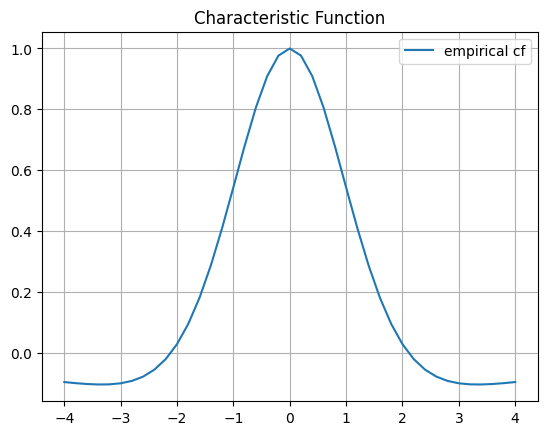

In [ ]:
alpha = 1.5
N = 5000000
delta = 0.05

T = np.linspace(-4, 4, 41)


X1 = simulate_sample(alpha, N) #levy_stable.rvs(alpha, 0, size=N)
X0 = simulate_sample(alpha - delta, N) #levy_stable.rvs(alpha - delta, 0, size=N)

def cf(t, alpha):
    return np.exp(-(abs(t))**alpha)
def d_cf(t, alpha):
    if t == 0:
      return 0
    else:
      return -(abs(t))**alpha*np.log(abs(t))*cf(t, alpha)

ecf = []
tcf  = []
d_ecf = []
d_tcf = []
for t in T:
    ecf.append(np.mean(np.cos(t*X1)))
    tcf.append(cf(t, alpha))
    d_ecf.append( ( np.mean(np.cos(t*X1)) - np.mean(np.cos(t*X0))  )/delta )
    d_tcf.append(d_cf(t, alpha))

#plt.plot(T, d_tcf)
plt.plot(T, ecf)
plt.grid()
plt.legend(['empirical cf'])
plt.title('Characteristic Function')
plt.show()

Let us remind the meaning of the A and b functions:

-  **A(a, T)** is used to generate the matrix $A(\alpha) = \{\psi(t_i+t_j,{\alpha}) + \psi(t_i-t_j,\alpha),\quad i,j=0,1,..,k\}$
-  **b(a, T)** is used to generate the vector $b(\alpha)=\{0\}\cup \{  \psi_{\alpha}(t_j, \alpha)),\quad j=1,2,..,k \}$. The usage of these functions enables us to formulate the following equation 
$$\sum_{v=1}^k \color{red}{a_v} \color{black}\cdot (\psi(t_i+t_j,{\alpha}) + \psi(t_i-t_j,\alpha))=\psi_{\alpha}(t_j, \alpha)$$
for $j=1,2,...,k$, which is solved in terms of $a_v$, i.e. if $a(\alpha)=\{a_v,\quad v=1,2,...,k \}$, then $$a(\alpha)={\left( A(\alpha)\right)}^{-1} b(\alpha)$$

These functions are simple if the characteristic function has an explicit form. However, in our case this function is not known. Therefore, it will be obtained from the observations. 

Function **A(a, T)** is replace with **A_emp(a, T, N)** which differs from the initial function by an additional argument: $\mathbf{N}$ which is the number of observations. Note that we can choose any value of this parameter (provided that the system would not crash). E.g. if $\mathbf{N>5\cdot 10^7}$ this notebook has crashed several times. 

So **A_emp(a, T, N)** is used to generate the matrix $A(\alpha) = \{\psi_{\mathbf{X}}^{\mathrm{emp}}(t_i+t_j,\alpha) + \psi_{\mathbf{X}}^{\mathrm{emp}}(t_i-t_j,\alpha),\quad i,j=0,1,..,k\}$ where
$$\psi_{\mathbf{X}}^{\mathrm{emp}}(t, \alpha)=\frac{1}{N}\sum_{j=1}^{N}\cos(t\cdot X_j)$$
and $\mathbf{X}$ is a sample from $Y$ with the parameter $\alpha$. 

If the $Y$'s parameter is $\alpha$, we can defined it as $Y_{\alpha}$.

The function **b(a, T)** is the derivative of the characteristic function with respect to $\alpha$. In this report, the derivative of the characteristic function is calculated in a straightforward manner: 

$$\psi_{\alpha}(t, \alpha)=\frac{\partial }{\partial \alpha}\psi(t, \alpha)\approx \frac{\partial }{\partial \alpha}\psi_{\mathbf{X}}^{\mathrm{emp}}(t, \alpha) \approx \frac{ \psi_{\mathbf{X}}^{\mathrm{emp}}(t, \alpha) - \psi_{\mathbf{X}}^{\mathrm{emp}}(t, \alpha-\delta)}{\delta }$$

That is why the empirical version of **b(a, T)** contains two model parameters: N and $\delta$ i.e. delta.

The calculation of $\frac{ \psi_{\mathbf{X}}^{\mathrm{emp}}(t, \alpha) - \psi_{\mathbf{X}}^{\mathrm{emp}}(t, \alpha-\delta)}{\delta }$ is conducted as follows:



 




*   For a given $\alpha$ choose the delta ($\delta$) and $N$
*   Generate a sample from $Z_{\alpha}$ with $N$ elements $\mathbf{X}_{N, \alpha}$
*   Generate a second independent sample from $Z_{\alpha-\delta}$ with $N$ elements $\mathbf{X}_{N, \alpha-\delta}$
*   For every $t\in T$ calculate the characteristic functions $\psi_{\mathbf{X}_{N, \alpha}}^{\mathrm{emp}}(t, \alpha)$ and $\psi_{\mathbf{X}_{N, \alpha-\delta}}^{\mathrm{emp}}(t, \alpha-\delta)$ and hence: 
$$\psi_{\alpha}(t, \alpha)\approx \frac{ \psi_{\mathbf{X}_{N,\alpha}}^{\mathrm{emp}}(t, \alpha) - \psi_{\mathbf{X}_{N, \color{red}\alpha -\color{red}\delta}}^{\mathrm{emp}}(t, \alpha-\delta)}{\delta }.$$

In [ ]:
def A_emp(T, a, N):
    X1 = simulate_sample(a, N)
    A, B = np.meshgrid(T, T)
    for t1 in range(len(T)):
        for t2 in range(len(T)):
            A[t1, t2] = np.mean(np.cos((T[t1] + T[t2])*X1)) + np.mean(np.cos((T[t1] - T[t2])*X1))
    return A

def B_emp(a, T, N, delta):
    X1 = simulate_sample(a, N)
    X0 = simulate_sample(a - delta, N)    # levy_stable.rvs(a - delta, 0, size=N) 
    d_ecf = []
    for t in T:
        d_ecf.append( ( np.mean(np.cos(t*X1)) - np.mean(np.cos(t*X0))  )/delta )
    return np.array(d_ecf) 

def F(X, T):
    X1 = np.outer(X, T)
    Y1 = np.cos(X1)
    FX = np.mean(Y1, axis=0)
    return 2*FX


Calculation of the values of $T$.

In [ ]:
T = np.arange(0, 2, 0.4)
T = portfolio_of_functions[fun](T)

Setting the range of $\alpha$. Since we $Z$ depends on the stable distribution, where the $\alpha$ is its tail index, $\alpha$ should be in the interval $(0, 2]$.

In [ ]:
Alphas = np.linspace(1.5, 1.99, 20)
Beta_Vect0 = {}
A_matr0 = {}

#The remaining lines is relevant only if the stable distribution is chosen. 
# N_M = 100000
# N_V = 10*10**6

# for a in Alphas:
#     A_M = A(a, T)
#     A_matr0.update({a: A_M})
#     #print(f"For a = {a}, matrix is computed")
#     B_V = B(a, T)
#     Beta_Vect0.update({a: B_V})
#     #print(f"For a = {a}, vector is computed")
#     #print('------------------------------------')

In the following cell we calculate the values of **A_emp(a, T, N)** and **b_emp(a, T, N, delta)**. This operation is trivial if the characteristic function has an explicit shape. Here, we use 30 million sample sizes.

In [ ]:

Beta_Vect = {}
A_matr = {}

# The sample size for A_emp and B_emp is 30 million
N_M = 30000000
N_V = 30000000

for a in Alphas:
    A_M = A_emp(T, a, N_M)
    A_matr.update({a: A_M}) 
    print(f"For a = {a}, matrix is computed")
    B_V = B_emp(a, T, N_V, 0.05)
    Beta_Vect.update({a: B_V})
    print(f"For a = {a}, vector is computed")
    print('------------------------------------')

For a = 1.5, matrix is computed
For a = 1.5, vector is computed
------------------------------------
For a = 1.5257894736842106, matrix is computed
For a = 1.5257894736842106, vector is computed
------------------------------------
For a = 1.551578947368421, matrix is computed
For a = 1.551578947368421, vector is computed
------------------------------------
For a = 1.5773684210526315, matrix is computed
For a = 1.5773684210526315, vector is computed
------------------------------------
For a = 1.6031578947368421, matrix is computed
For a = 1.6031578947368421, vector is computed
------------------------------------
For a = 1.6289473684210527, matrix is computed
For a = 1.6289473684210527, vector is computed
------------------------------------
For a = 1.654736842105263, matrix is computed
For a = 1.654736842105263, vector is computed
------------------------------------
For a = 1.6805263157894736, matrix is computed
For a = 1.6805263157894736, vector is computed
-----------------------

The following function **projection_vectors_emp** calculates the projections vectors, the inverse of the A matrix, and the Fisher information. 

In [ ]:
def projection_vectors_emp(A_matr, Beta_Vect):
    Alphas = list(A_matr.keys())
    Fisher_Info = []
    projection_vectors = {}
    invers_matrices = {}
    for a in Alphas: 
        A1 = A_matr[a]
        b1 = Beta_Vect[a]
        A1_inv = np.linalg.inv(A1)
        invers_matrices.update({a: A1_inv})
        projection_vectors.update({a: np.dot(A1_inv, b1)})
        Fisher_Info.append(np.dot(projection_vectors[a], b1 ))
    return invers_matrices, projection_vectors, Fisher_Info

Implementing the function **projection_vectors_emp**.

In [ ]:
invers_matrices, projection_vectors, Fisher = projection_vectors_emp(A_matr, Beta_Vect)
KEYS = list(A_matr.keys())

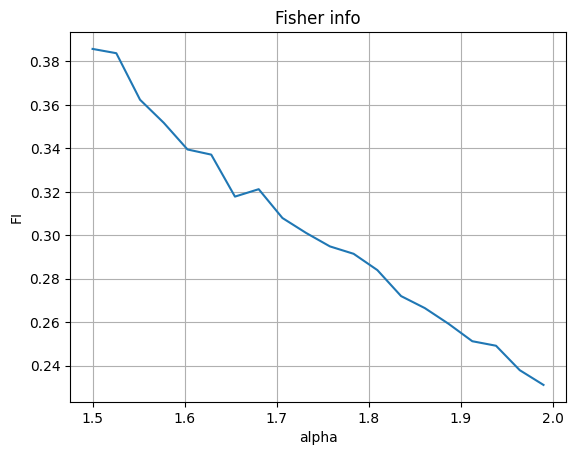

In [ ]:
# Calculation of the Fisher information of alpha
plt.plot(Alphas, Fisher)
plt.grid()
plt.ylabel('FI')
plt.xlabel('alpha')
plt.title('Fisher info')
plt.show()

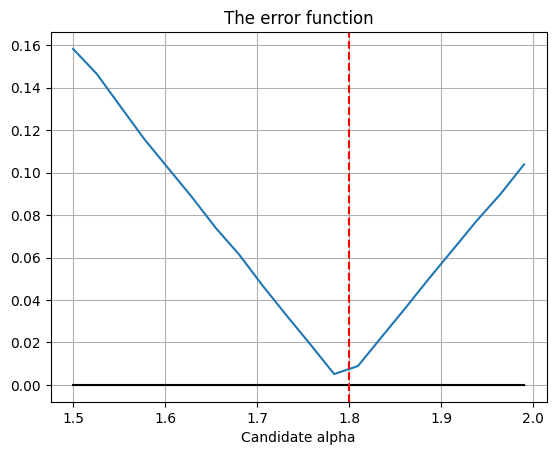

In [ ]:
#Visualization of the error function
N = 10000
alpha = 1.8
X = simulate_sample(alpha, N)
FX = F(X, T)

y = []
y1 = []
for k in KEYS:
    #y.append(np.dot(FX, projection_vectors0[k]))
    y1.append(np.dot(FX, projection_vectors[k]))
#plt.plot(Alphas, np.abs(y))
plt.plot(Alphas, np.abs(y1))
plt.plot(Alphas, np.array(y1)*0,'k')
plt.axvline(x=alpha, color='red', linestyle='--')
plt.grid()
plt.title('The error function')
plt.xlabel('Candidate alpha')
plt.show()
#plt.ylim([-0.02,0.02])

In [ ]:
def truncate_string(num):
    num = round(num, 4)
    num = str(num)
    new_string = num[:6]
    return new_string + "0" * (6 - len(new_string))

In [ ]:
N = 100000
num_samples = 50

#Avg_Alpha_Estimates_t = []
Avg_Alpha_Estimates_e = []
#Std_Alpha_Estimates_t = []
Std_Alpha_Estimates_e = []

for alpha in Alphas:
    #Ests_t = []
    Ests_e = []
    for _ in range(num_samples):

        X = simulate_sample(alpha, N)
        FX = F(X, T)

        y_e = []
        #y_t = []

        for k in KEYS:
            #y_t.append(abs(np.dot(FX, projection_vectors0[k])))
            y_e.append(abs(np.dot(FX, projection_vectors[k])))    

        #argmin_t = np.argmin(y_t) 
        argmin_e = np.argmin(y_e) 

        #alpha_est_t = Alphas[argmin_t]
        alpha_est_e = Alphas[argmin_e]

        #Ests_t.append(alpha_est_t)
        Ests_e.append(alpha_est_e)
    #Avg_Alpha_Estimates_t.append(np.mean(Ests_t))
    #Std_Alpha_Estimates_t.append(np.std(Ests_t))
    Avg_Alpha_Estimates_e.append(np.mean(Ests_e))
    Std_Alpha_Estimates_e.append(np.std(Ests_e))
    print(f"Target alpha = {truncate_string(alpha)}, avg alpha_MLP_e = {truncate_string(np.mean(Ests_e))} ")
    


Target alpha = 1.5000, avg alpha_MLP_e = 1.5000 
Target alpha = 1.5258, avg alpha_MLP_e = 1.5258 
Target alpha = 1.5516, avg alpha_MLP_e = 1.5516 
Target alpha = 1.5774, avg alpha_MLP_e = 1.5774 
Target alpha = 1.6032, avg alpha_MLP_e = 1.6032 
Target alpha = 1.6289, avg alpha_MLP_e = 1.6289 
Target alpha = 1.6547, avg alpha_MLP_e = 1.6547 
Target alpha = 1.6805, avg alpha_MLP_e = 1.6805 
Target alpha = 1.7063, avg alpha_MLP_e = 1.7063 
Target alpha = 1.7321, avg alpha_MLP_e = 1.7321 
Target alpha = 1.7579, avg alpha_MLP_e = 1.7584 
Target alpha = 1.7837, avg alpha_MLP_e = 1.7837 
Target alpha = 1.8095, avg alpha_MLP_e = 1.8095 
Target alpha = 1.8353, avg alpha_MLP_e = 1.8353 
Target alpha = 1.8611, avg alpha_MLP_e = 1.8611 
Target alpha = 1.8868, avg alpha_MLP_e = 1.8868 
Target alpha = 1.9126, avg alpha_MLP_e = 1.9126 
Target alpha = 1.9384, avg alpha_MLP_e = 1.9384 
Target alpha = 1.9642, avg alpha_MLP_e = 1.9642 
Target alpha = 1.9900, avg alpha_MLP_e = 1.9900 


In [ ]:
def visualize_samples(values_of_alpha, Means, upper_line, lower_line, N):      
      fig = plt.figure(figsize=(9, 9))
      plt.plot(values_of_alpha, Means, 'g-o')
      plt.plot(values_of_alpha, upper_line, 'b')
      plt.plot(values_of_alpha, lower_line, 'r')
      plt.plot(values_of_alpha, values_of_alpha, 'k')
      plt.fill_between(values_of_alpha, upper_line, lower_line, color='gray', alpha=0.5)
      plt.grid()
      plt.xlabel('alpha')
      plt.ylabel('alpha_estimate')
      plt.title(r'Demonstration of the average estimate and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))
      plt.legend(['$\mu$,  $\mu = avg(alpha\_sample)$','$ \mu + 3*\sigma$,  $\sigma = std(alpha\_sample)$', '$\mu - 3*\sigma$',  'real_alpha'])
      plt.ylim([1.15, 2.3])

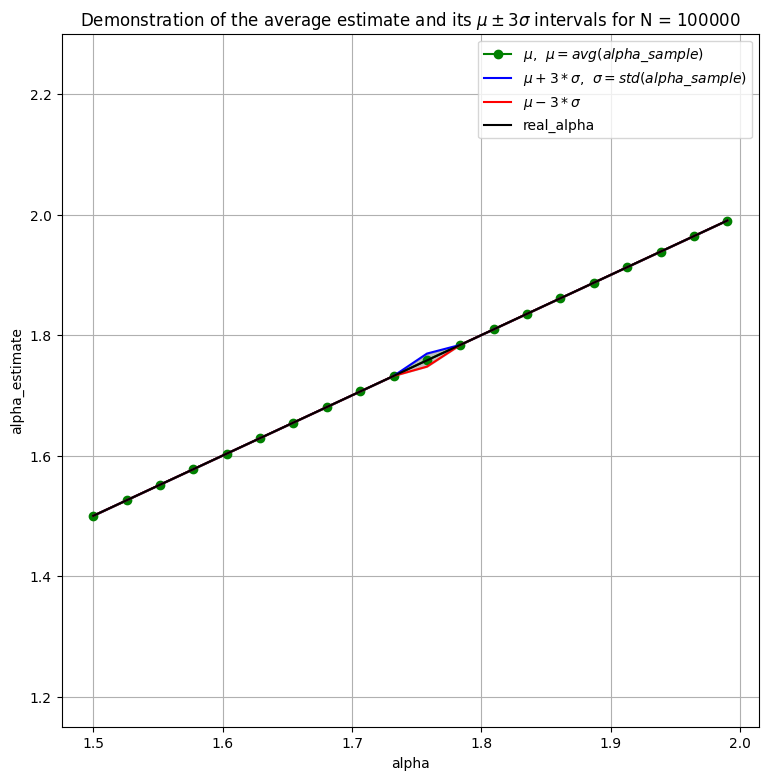

In [ ]:
values_of_alpha = Alphas
Means_100000 = Avg_Alpha_Estimates_e
upper_line_100000 = np.array(Avg_Alpha_Estimates_e) + 3*np.array(Std_Alpha_Estimates_e)
lower_line_100000 = np.array(Avg_Alpha_Estimates_e) - 3*np.array(Std_Alpha_Estimates_e)
visualize_samples(values_of_alpha, Means_100000, upper_line_100000, lower_line_100000, N)

Target alpha = 1.5000, avg alpha_MLP_e = 1.5129 
Target alpha = 1.5258, avg alpha_MLP_e = 1.5387 
Target alpha = 1.5516, avg alpha_MLP_e = 1.5593 
Target alpha = 1.5774, avg alpha_MLP_e = 1.5944 
Target alpha = 1.6032, avg alpha_MLP_e = 1.6078 
Target alpha = 1.6289, avg alpha_MLP_e = 1.6284 
Target alpha = 1.6547, avg alpha_MLP_e = 1.6620 
Target alpha = 1.6805, avg alpha_MLP_e = 1.6908 
Target alpha = 1.7063, avg alpha_MLP_e = 1.7084 
Target alpha = 1.7321, avg alpha_MLP_e = 1.7357 
Target alpha = 1.7579, avg alpha_MLP_e = 1.7620 
Target alpha = 1.7837, avg alpha_MLP_e = 1.7888 
Target alpha = 1.8095, avg alpha_MLP_e = 1.8012 
Target alpha = 1.8353, avg alpha_MLP_e = 1.8445 
Target alpha = 1.8611, avg alpha_MLP_e = 1.8507 
Target alpha = 1.8868, avg alpha_MLP_e = 1.8739 
Target alpha = 1.9126, avg alpha_MLP_e = 1.9121 
Target alpha = 1.9384, avg alpha_MLP_e = 1.9425 
Target alpha = 1.9642, avg alpha_MLP_e = 1.9529 
Target alpha = 1.9900, avg alpha_MLP_e = 1.9652 


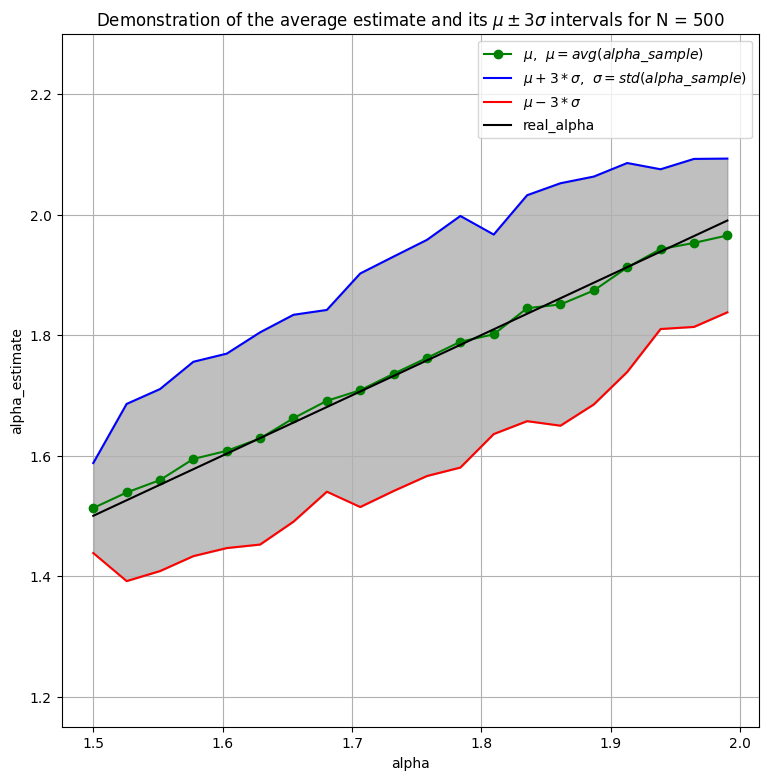

In [ ]:
N = 500
num_samples = 50

#Avg_Alpha_Estimates_t = []
Avg_Alpha_Estimates_e = []
#Std_Alpha_Estimates_t = []
Std_Alpha_Estimates_e = []

for alpha in Alphas:
    #Ests_t = []
    Ests_e = []
    for _ in range(num_samples):

        X = simulate_sample(alpha, N)
        FX = F(X, T)

        y_e = []
        #y_t = []

        for k in KEYS:
            #y_t.append(abs(np.dot(FX, projection_vectors0[k])))
            y_e.append(abs(np.dot(FX, projection_vectors[k])))    

        #argmin_t = np.argmin(y_t) 
        argmin_e = np.argmin(y_e) 

        #alpha_est_t = Alphas[argmin_t]
        alpha_est_e = Alphas[argmin_e]

        #Ests_t.append(alpha_est_t)
        Ests_e.append(alpha_est_e)
    #Avg_Alpha_Estimates_t.append(np.mean(Ests_t))
    #Std_Alpha_Estimates_t.append(np.std(Ests_t))
    Avg_Alpha_Estimates_e.append(np.mean(Ests_e))
    Std_Alpha_Estimates_e.append(np.std(Ests_e))
    print(f"Target alpha = {truncate_string(alpha)}, avg alpha_MLP_e = {truncate_string(np.mean(Ests_e))} ")

values_of_alpha = Alphas
Means_500 = Avg_Alpha_Estimates_e
upper_line_500 = np.array(Avg_Alpha_Estimates_e) + 3*np.array(Std_Alpha_Estimates_e)
lower_line_500 = np.array(Avg_Alpha_Estimates_e) - 3*np.array(Std_Alpha_Estimates_e)
visualize_samples(values_of_alpha, Means_500, upper_line_500, lower_line_500, N)   

Target alpha = 1.5000, avg alpha_MLP_e = 1.5072 
Target alpha = 1.5258, avg alpha_MLP_e = 1.5263 
Target alpha = 1.5516, avg alpha_MLP_e = 1.5547 
Target alpha = 1.5774, avg alpha_MLP_e = 1.5836 
Target alpha = 1.6032, avg alpha_MLP_e = 1.6068 
Target alpha = 1.6289, avg alpha_MLP_e = 1.6269 
Target alpha = 1.6547, avg alpha_MLP_e = 1.6542 
Target alpha = 1.6805, avg alpha_MLP_e = 1.6826 
Target alpha = 1.7063, avg alpha_MLP_e = 1.7104 
Target alpha = 1.7321, avg alpha_MLP_e = 1.7357 
Target alpha = 1.7579, avg alpha_MLP_e = 1.7584 
Target alpha = 1.7837, avg alpha_MLP_e = 1.7837 
Target alpha = 1.8095, avg alpha_MLP_e = 1.8115 
Target alpha = 1.8353, avg alpha_MLP_e = 1.8317 
Target alpha = 1.8611, avg alpha_MLP_e = 1.8611 
Target alpha = 1.8868, avg alpha_MLP_e = 1.8848 
Target alpha = 1.9126, avg alpha_MLP_e = 1.9188 
Target alpha = 1.9384, avg alpha_MLP_e = 1.9410 
Target alpha = 1.9642, avg alpha_MLP_e = 1.9627 
Target alpha = 1.9900, avg alpha_MLP_e = 1.9843 


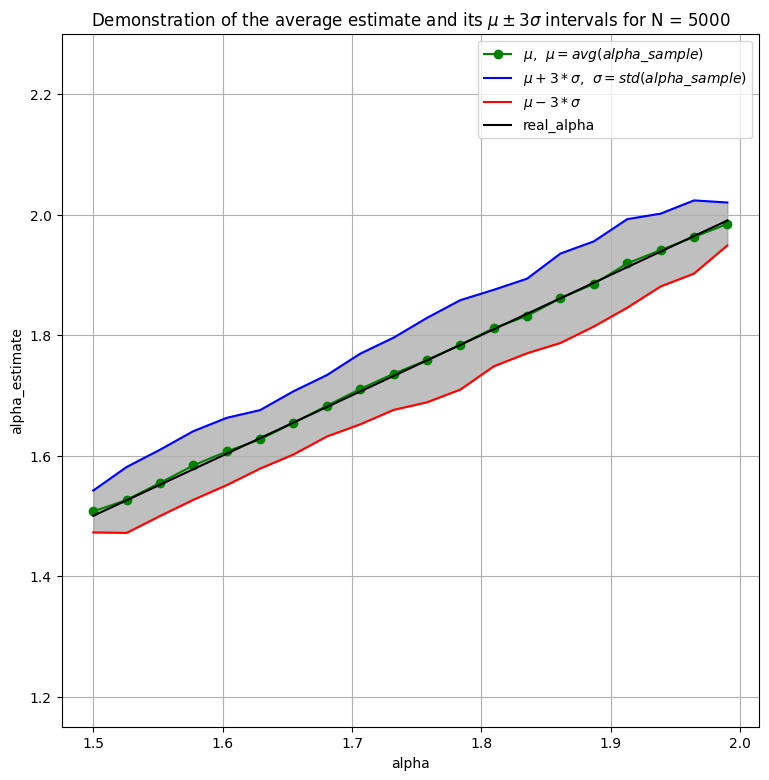

In [ ]:
N = 5000
num_samples = 50

#Avg_Alpha_Estimates_t = []
Avg_Alpha_Estimates_e = []
#Std_Alpha_Estimates_t = []
Std_Alpha_Estimates_e = []

for alpha in Alphas:
    #Ests_t = []
    Ests_e = []
    for _ in range(num_samples):

        X = simulate_sample(alpha, N)
        FX = F(X, T)

        y_e = []
        #y_t = []

        for k in KEYS:
            #y_t.append(abs(np.dot(FX, projection_vectors0[k])))
            y_e.append(abs(np.dot(FX, projection_vectors[k])))    

        #argmin_t = np.argmin(y_t) 
        argmin_e = np.argmin(y_e) 

        #alpha_est_t = Alphas[argmin_t]
        alpha_est_e = Alphas[argmin_e]

        #Ests_t.append(alpha_est_t)
        Ests_e.append(alpha_est_e)
    #Avg_Alpha_Estimates_t.append(np.mean(Ests_t))
    #Std_Alpha_Estimates_t.append(np.std(Ests_t))
    Avg_Alpha_Estimates_e.append(np.mean(Ests_e))
    Std_Alpha_Estimates_e.append(np.std(Ests_e))
    print(f"Target alpha = {truncate_string(alpha)}, avg alpha_MLP_e = {truncate_string(np.mean(Ests_e))} ")

values_of_alpha = Alphas
Means_5000 = Avg_Alpha_Estimates_e
upper_line_5000 = np.array(Avg_Alpha_Estimates_e) + 3*np.array(Std_Alpha_Estimates_e)
lower_line_5000 = np.array(Avg_Alpha_Estimates_e) - 3*np.array(Std_Alpha_Estimates_e)
visualize_samples(values_of_alpha, Means_5000, upper_line_5000, lower_line_5000, N)   

Target alpha = 1.5000, avg alpha_MLP_e = 1.5000 
Target alpha = 1.5258, avg alpha_MLP_e = 1.5258 
Target alpha = 1.5516, avg alpha_MLP_e = 1.5516 
Target alpha = 1.5774, avg alpha_MLP_e = 1.5774 
Target alpha = 1.6032, avg alpha_MLP_e = 1.6032 
Target alpha = 1.6289, avg alpha_MLP_e = 1.6289 
Target alpha = 1.6547, avg alpha_MLP_e = 1.6547 
Target alpha = 1.6805, avg alpha_MLP_e = 1.6805 
Target alpha = 1.7063, avg alpha_MLP_e = 1.7063 
Target alpha = 1.7321, avg alpha_MLP_e = 1.7321 
Target alpha = 1.7579, avg alpha_MLP_e = 1.7579 
Target alpha = 1.7837, avg alpha_MLP_e = 1.7837 
Target alpha = 1.8095, avg alpha_MLP_e = 1.8095 
Target alpha = 1.8353, avg alpha_MLP_e = 1.8353 
Target alpha = 1.8611, avg alpha_MLP_e = 1.8611 
Target alpha = 1.8868, avg alpha_MLP_e = 1.8868 
Target alpha = 1.9126, avg alpha_MLP_e = 1.9126 
Target alpha = 1.9384, avg alpha_MLP_e = 1.9384 
Target alpha = 1.9642, avg alpha_MLP_e = 1.9642 
Target alpha = 1.9900, avg alpha_MLP_e = 1.9900 


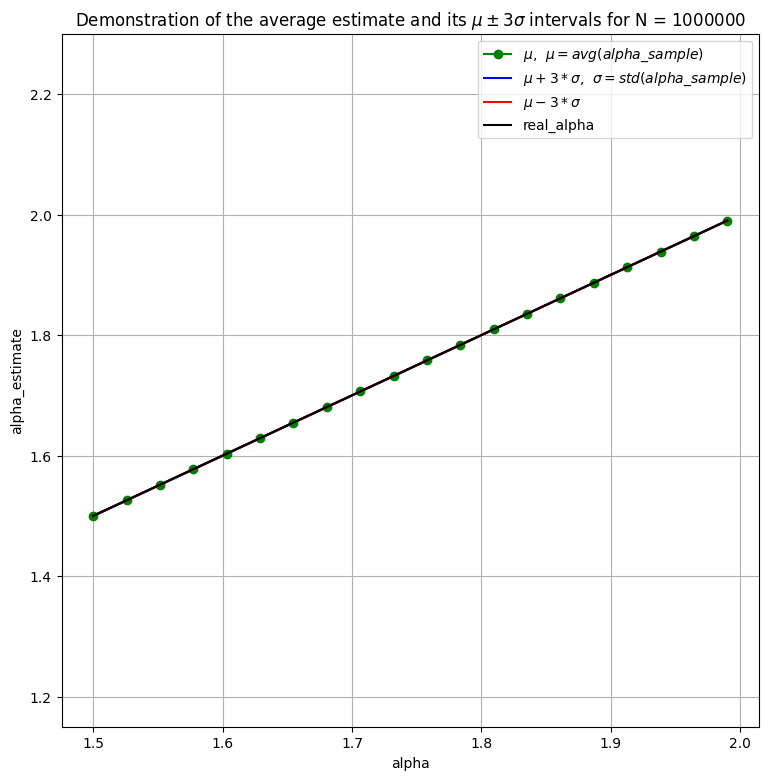

In [ ]:
N = 1000000
num_samples = 50

#Avg_Alpha_Estimates_t = []
Avg_Alpha_Estimates_e = []
#Std_Alpha_Estimates_t = []
Std_Alpha_Estimates_e = []

for alpha in Alphas:
    #Ests_t = []
    Ests_e = []
    for _ in range(num_samples):

        X = simulate_sample(alpha, N)
        FX = F(X, T)

        y_e = []
        #y_t = []

        for k in KEYS:
            #y_t.append(abs(np.dot(FX, projection_vectors0[k])))
            y_e.append(abs(np.dot(FX, projection_vectors[k])))    

        #argmin_t = np.argmin(y_t) 
        argmin_e = np.argmin(y_e) 

        #alpha_est_t = Alphas[argmin_t]
        alpha_est_e = Alphas[argmin_e]

        #Ests_t.append(alpha_est_t)
        Ests_e.append(alpha_est_e)
    #Avg_Alpha_Estimates_t.append(np.mean(Ests_t))
    #Std_Alpha_Estimates_t.append(np.std(Ests_t))
    Avg_Alpha_Estimates_e.append(np.mean(Ests_e))
    Std_Alpha_Estimates_e.append(np.std(Ests_e))
    print(f"Target alpha = {truncate_string(alpha)}, avg alpha_MLP_e = {truncate_string(np.mean(Ests_e))} ")

values_of_alpha = Alphas
Means = Avg_Alpha_Estimates_e
upper_line = np.array(Avg_Alpha_Estimates_e) + 3*np.array(Std_Alpha_Estimates_e)
lower_line = np.array(Avg_Alpha_Estimates_e) - 3*np.array(Std_Alpha_Estimates_e)
visualize_samples(values_of_alpha, Means, upper_line, lower_line, N)   

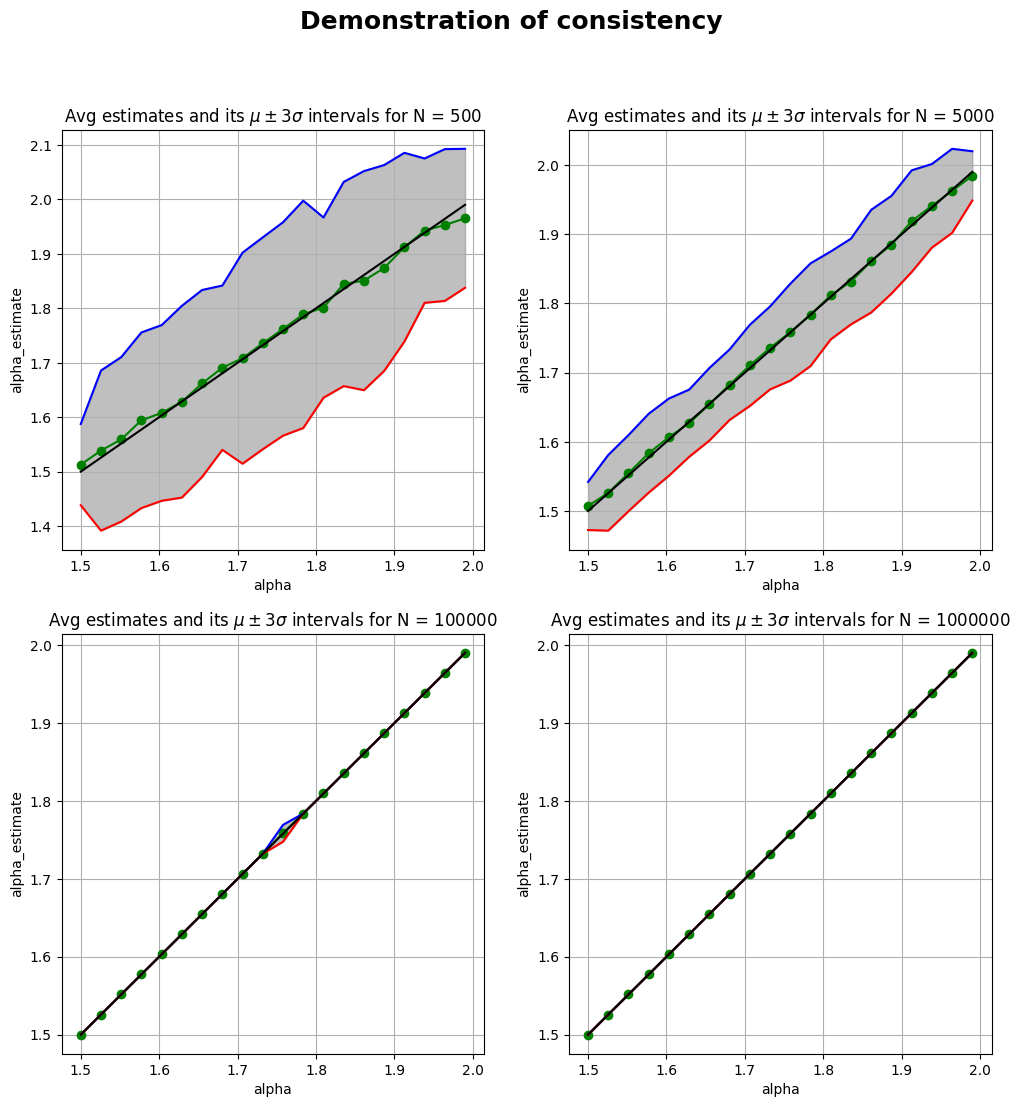

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

N = 500

axs[0, 0].plot(values_of_alpha, Means_500, 'g-o')
axs[0, 0].plot(values_of_alpha, upper_line_500, 'b')
axs[0, 0].plot(values_of_alpha, lower_line_500, 'r')
axs[0, 0].plot(values_of_alpha, values_of_alpha, 'k')
axs[0, 0].fill_between(values_of_alpha, upper_line_500, lower_line_500, color='gray', alpha=0.5)
axs[0, 0].grid()
axs[0, 0].set_xlabel('alpha')
axs[0, 0].set_ylabel('alpha_estimate')
axs[0, 0].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))

N = 5000
axs[0, 1].plot(values_of_alpha, Means_5000, 'g-o')
axs[0, 1].plot(values_of_alpha, upper_line_5000, 'b')
axs[0, 1].plot(values_of_alpha, lower_line_5000, 'r')
axs[0, 1].plot(values_of_alpha, values_of_alpha, 'k')
axs[0, 1].fill_between(values_of_alpha, upper_line_5000, lower_line_5000, color='gray', alpha=0.5)
axs[0, 1].grid()
axs[0, 1].set_xlabel('alpha')
axs[0, 1].set_ylabel('alpha_estimate')
axs[0, 1].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))

N = 100000
axs[1, 0].plot(values_of_alpha, Means_100000, 'g-o')
axs[1, 0].plot(values_of_alpha, upper_line_100000, 'b')
axs[1, 0].plot(values_of_alpha, lower_line_100000, 'r')
axs[1, 0].plot(values_of_alpha, values_of_alpha, 'k')
axs[1, 0].fill_between(values_of_alpha, upper_line_100000, lower_line_100000, color='gray', alpha=0.5)
axs[1, 0].grid()
axs[1, 0].set_xlabel('alpha')
axs[1, 0].set_ylabel('alpha_estimate')
axs[1, 0].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))

N = 10**6
axs[1, 1].plot(values_of_alpha, Means, 'g-o')
axs[1, 1].plot(values_of_alpha, upper_line, 'b')
axs[1, 1].plot(values_of_alpha, lower_line, 'r')
axs[1, 1].plot(values_of_alpha, values_of_alpha, 'k')
axs[1, 1].fill_between(values_of_alpha, upper_line, lower_line, color='gray', alpha=0.5)
axs[1, 1].grid()
axs[1, 1].set_xlabel('alpha')
axs[1, 1].set_ylabel('alpha_estimate')
axs[1, 1].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))
plt.suptitle('Demonstration of consistency', fontsize=18, fontweight='bold')
plt.show()

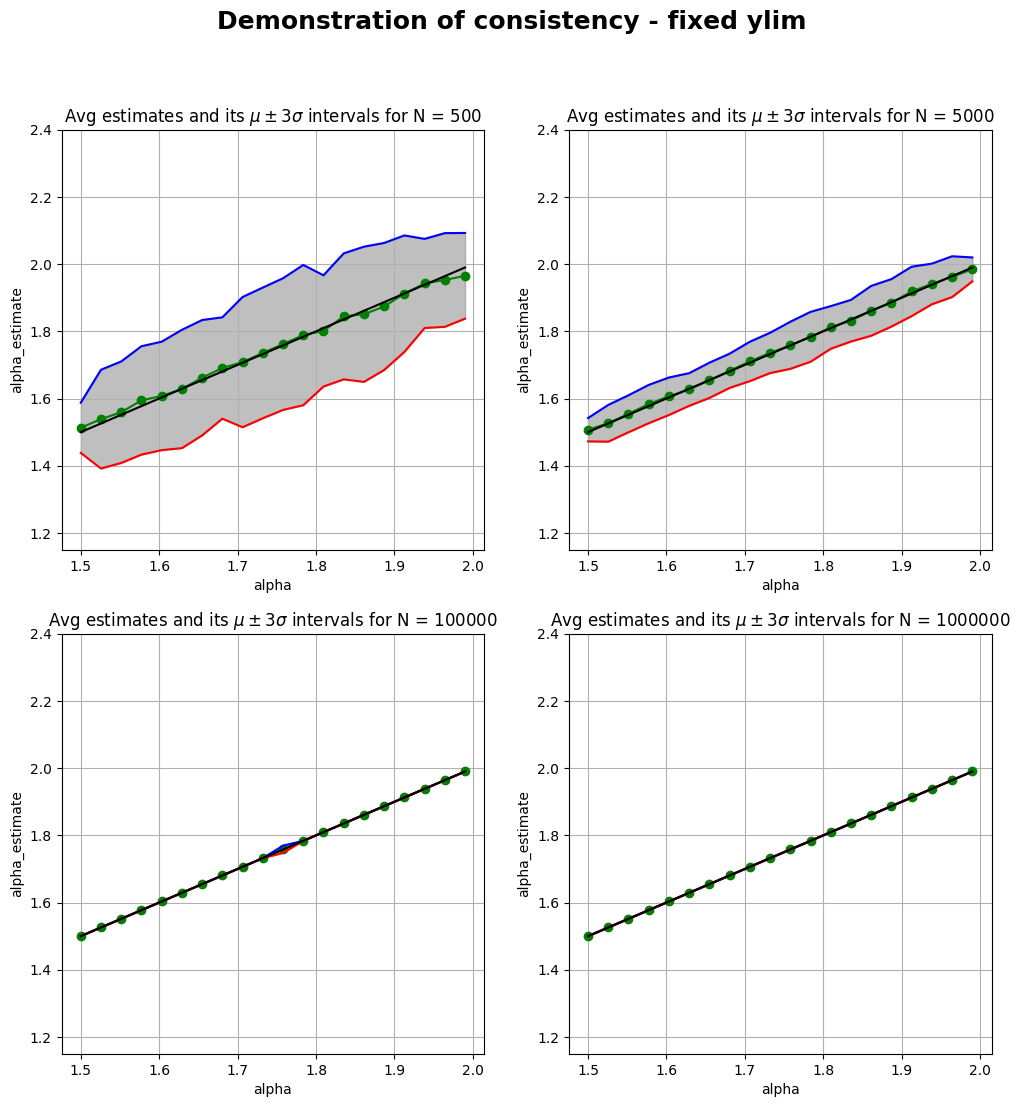

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

N = 500

axs[0, 0].plot(values_of_alpha, Means_500, 'g-o')
axs[0, 0].plot(values_of_alpha, upper_line_500, 'b')
axs[0, 0].plot(values_of_alpha, lower_line_500, 'r')
axs[0, 0].plot(values_of_alpha, values_of_alpha, 'k')
axs[0, 0].fill_between(values_of_alpha, upper_line_500, lower_line_500, color='gray', alpha=0.5)
axs[0, 0].grid()
axs[0, 0].set_xlabel('alpha')
axs[0, 0].set_ylabel('alpha_estimate')
axs[0, 0].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))
axs[0, 0].set_ylim([1.15, 2.4])

N = 5000
axs[0, 1].plot(values_of_alpha, Means_5000, 'g-o')
axs[0, 1].plot(values_of_alpha, upper_line_5000, 'b')
axs[0, 1].plot(values_of_alpha, lower_line_5000, 'r')
axs[0, 1].plot(values_of_alpha, values_of_alpha, 'k')
axs[0, 1].fill_between(values_of_alpha, upper_line_5000, lower_line_5000, color='gray', alpha=0.5)
axs[0, 1].grid()
axs[0, 1].set_xlabel('alpha')
axs[0, 1].set_ylabel('alpha_estimate')
axs[0, 1].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))
axs[0, 1].set_ylim([1.15, 2.4])

N = 100000
axs[1, 0].plot(values_of_alpha, Means_100000, 'g-o')
axs[1, 0].plot(values_of_alpha, upper_line_100000, 'b')
axs[1, 0].plot(values_of_alpha, lower_line_100000, 'r')
axs[1, 0].plot(values_of_alpha, values_of_alpha, 'k')
axs[1, 0].fill_between(values_of_alpha, upper_line_100000, lower_line_100000, color='gray', alpha=0.5)
axs[1, 0].grid()
axs[1, 0].set_xlabel('alpha')
axs[1, 0].set_ylabel('alpha_estimate')
axs[1, 0].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))
axs[1, 0].set_ylim([1.15, 2.4])

N = 10**6
axs[1, 1].plot(values_of_alpha, Means, 'g-o')
axs[1, 1].plot(values_of_alpha, upper_line, 'b')
axs[1, 1].plot(values_of_alpha, lower_line, 'r')
axs[1, 1].plot(values_of_alpha, values_of_alpha, 'k')
axs[1, 1].fill_between(values_of_alpha, upper_line, lower_line, color='gray', alpha=0.5)
axs[1, 1].grid()
axs[1, 1].set_xlabel('alpha')
axs[1, 1].set_ylabel('alpha_estimate')
axs[1, 1].set_title(r'Avg estimates and its $\mu \pm 3 \sigma$ intervals for N = ' + str(N))
axs[1, 1].set_ylim([1.15, 2.4])
plt.suptitle('Demonstration of consistency - fixed ylim', fontsize=18, fontweight='bold')
plt.show()